# 🛑 Fill in the following details

- Name and Surname of the team members:
- Group Number:
- Dataset name:
- Date:
- Time spent on the project:
- Main difficulties encountered in the development:

# General instructions

**Context of the practice, preliminaries and instructions**.

This is the workbook that you will use as a **template** for the team project.

The project is **aligned** with the theory sessions and the code examples seen in the classroom, so a review of the class material is recommended prior to the implementation of the project.

Please **read carefully** the instructions. If you have any questions, please contact the teacher (but do not share code with other groups).

Each section that needs to be completed is marked with the 🛑 symbol.

General code considerations:
- When asked to present a value or result, display it with proper context and precision, i.e. "The table has 100 rows and 4 columns" instead of displaying "100 4" on screen or "66.7% precision" instead of simply printing "0.6666666666".
- Use as many cells (text or code) as you consider to give a readable and clear answer to the questions asked.
- Show intermediate or final results (tables, variable contents...) to prove that the solution is correct if necessary.
- Do not forget to import all the libraries necessary for the correct execution of the code, including their installation, if necessary.

**To hand in the notebook:**  
- Print it as a PDF file with all the sections expanded and all the cells executed, so that all the code can be seen and all the results are displayed.
- Save the notebook as an ipynb file.

Send both files in a zip folder to ALUD. Name the files with your group number.

**Evaluation:**  A complete explanation of what comprises the team project can be found [here](https://alud.deusto.es/pluginfile.php/651747/mod_resource/content/1/00_b_team_project.pdf)

The grading of the exercises shall be based on the following criteria:
- [9 to 10] points: The solution provided fulfils the requirements in an excellent manner and there are positive or extra aspects that endorse its excellence.
- [7 to 9] points: The solution provided meets the requirements, but some minor issues could be improved, such as: presentation of the solution, justification of the decision taken, efficiency of the code...
- [5 to 7] points: The solutions provided do not meet some of the requirements, such as: a question is not answered, the solution is not provided for a part...
- [1 to 5] points: The solution provided does not meet several requirements.
- [0] points: Solution not provided or plagiarised solution.

The cleanliness and efficiency of the code as well as the explanations given will be taken into account for the evaluation.



---





# 🛑 Dataset description

Describe the dataset that you are using, url, etc...







---



## Installations and Imports


In [2]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

Imports only for NVIDIA GPUS with rapids24.10

In [3]:
import cuml
from cuml.svm import SVC as cuSVC

# 🛑 Data Cleaning

Analyse the data in you dataset, provide a statistichal analysis, visualizations...

Clean and prepare the data, use the different methods seen in class.

### **BANK MARKETING DATASET**

Conversion of .arff file to .csv for easier manageability

In [4]:
#The name of the datasets have not been changed from the original download name

with open('phpkIxskf.arff', 'r') as f:
    data, meta = arff.loadarff(f)

column_names = [
    'age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
    'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
    'previous', 'poutcome', 'deposit']

df = pd.DataFrame(data)
df.columns = column_names

df.to_csv('Bank_Marketing.csv', index=False)

print("Bank Marketing dataset processed and saved as CSV")

Bank Marketing dataset processed and saved as CSV


In [5]:
bank_dataset = pd.read_csv('Bank_Marketing.csv')
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'


In [6]:
#We can see that there is a problem with the strings being coded with a b and ' '

def clean_b(value):
    if isinstance(value, str) and value.startswith("b'"):
        return value[2:-1]
    return value

bank_dataset = bank_dataset.map(clean_b)
bank_dataset.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,1
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,1
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,1
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,1
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,1


In [7]:
#Deposit variable is stored as 1 and 2 instead of no and yes, let's change it

bank_dataset['deposit'] = bank_dataset['deposit'].replace({ '1' : 'no' , '2' : 'yes'})
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [8]:
#Now that the dataset is correctly loaded we can create some graphs and statistics before cleaning

print(bank_dataset.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

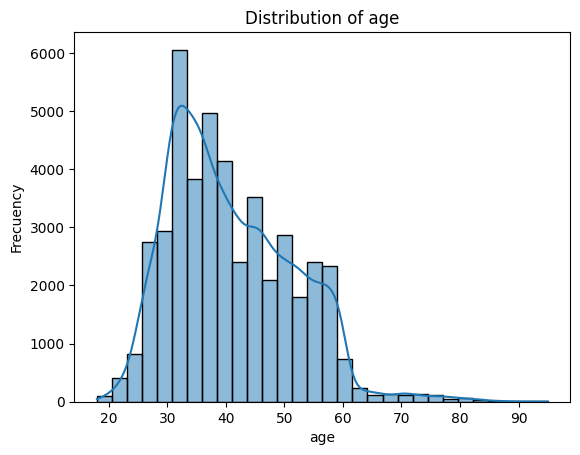

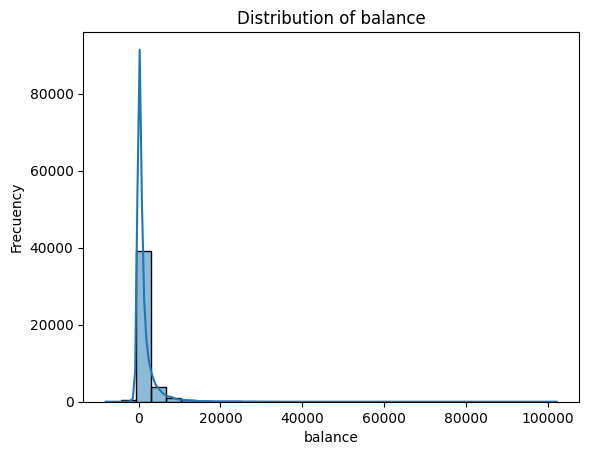

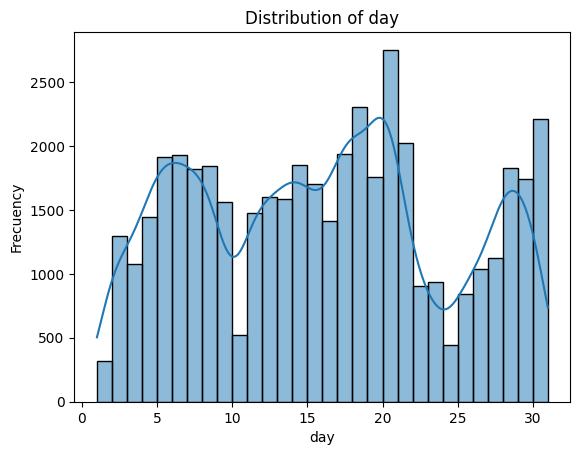

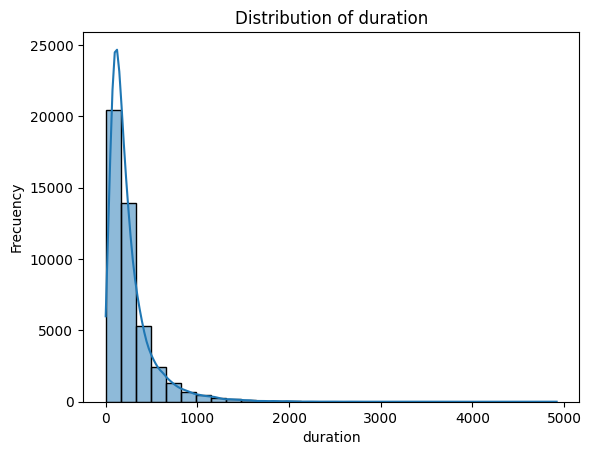

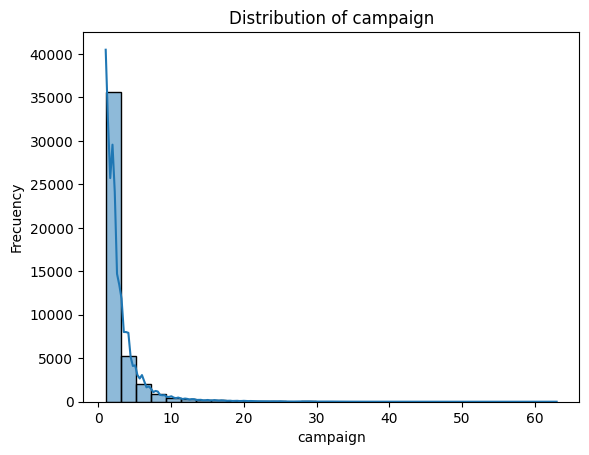

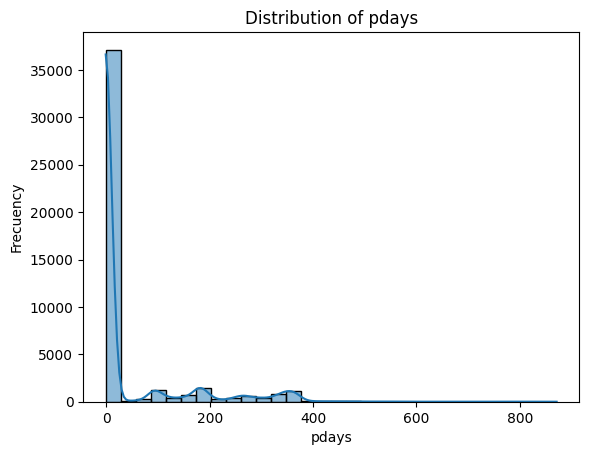

In [9]:
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']
for col in numeric_columns:
    sns.histplot(bank_dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
    plt.show()

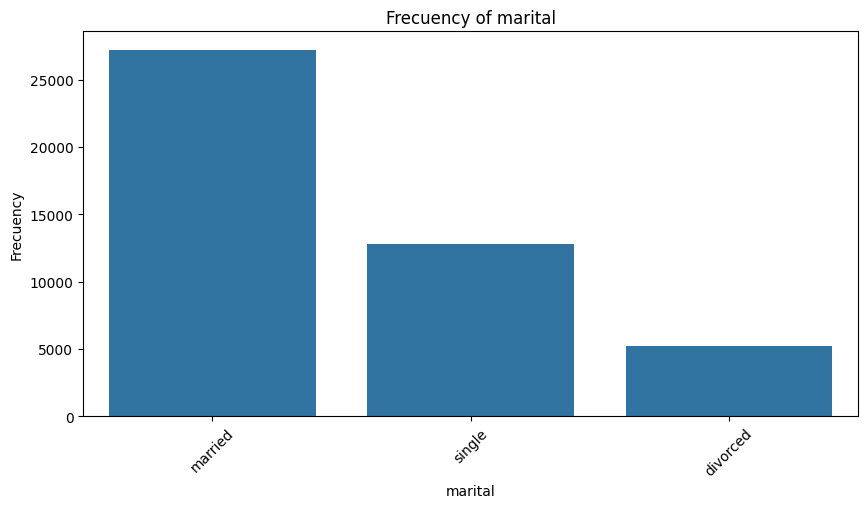

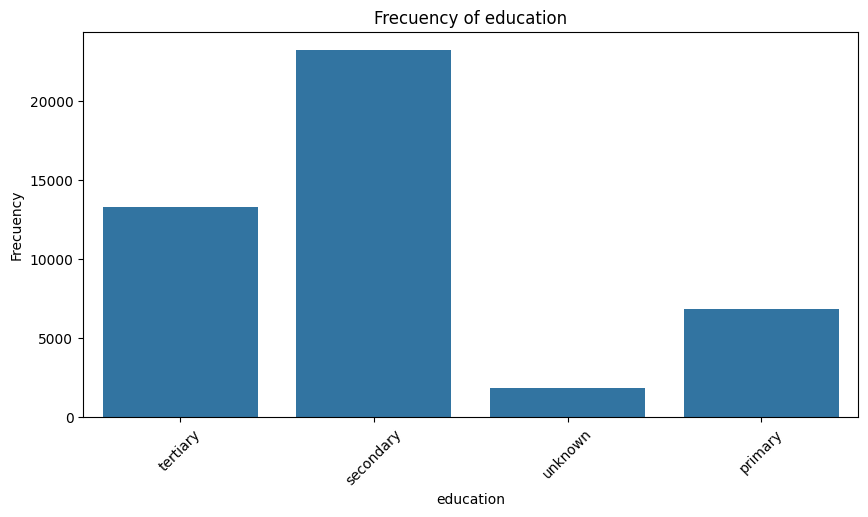

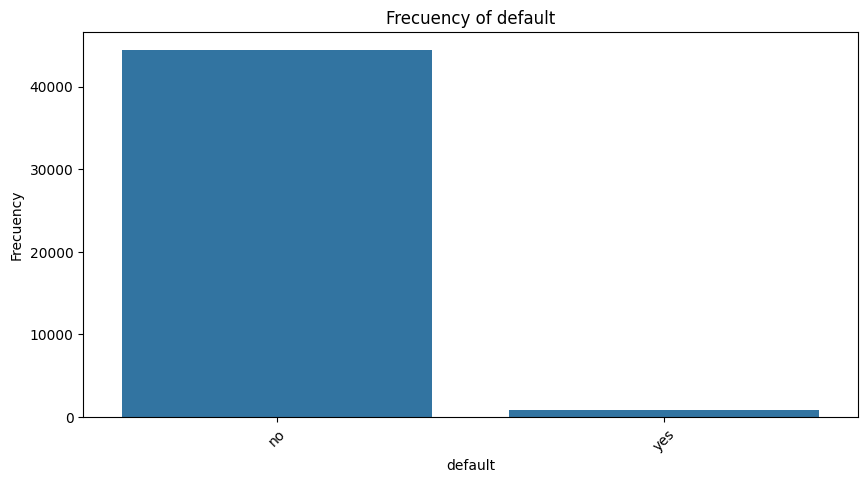

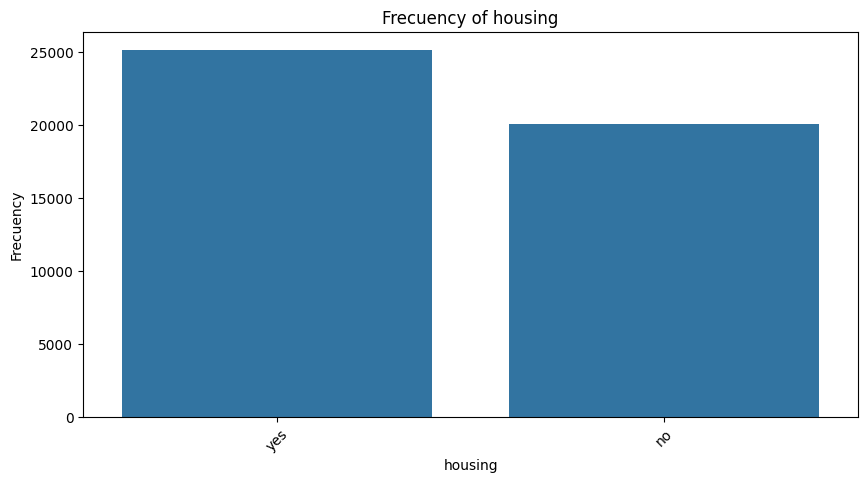

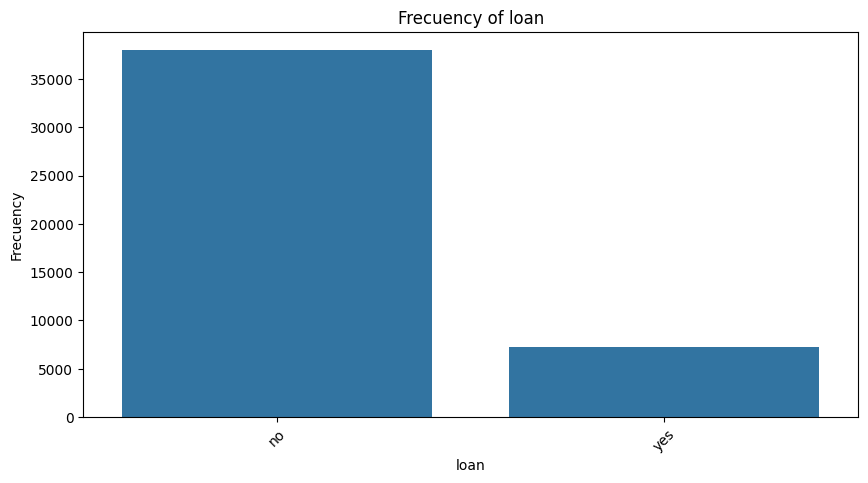

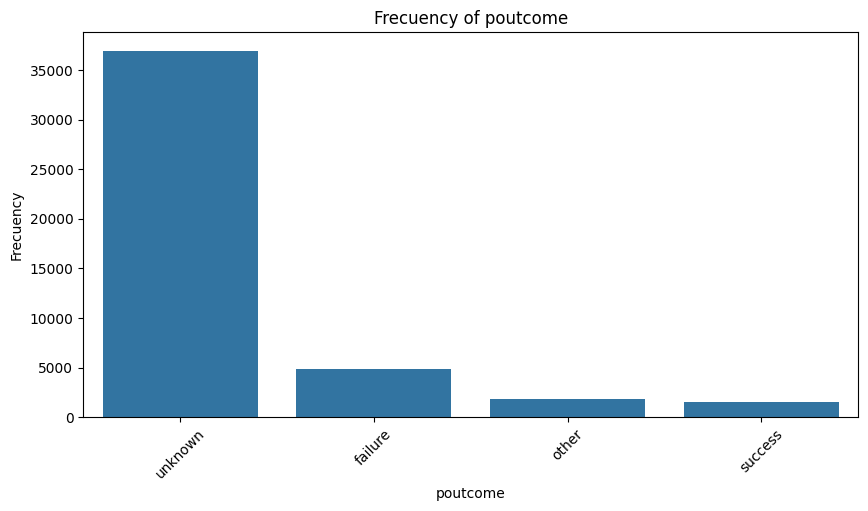

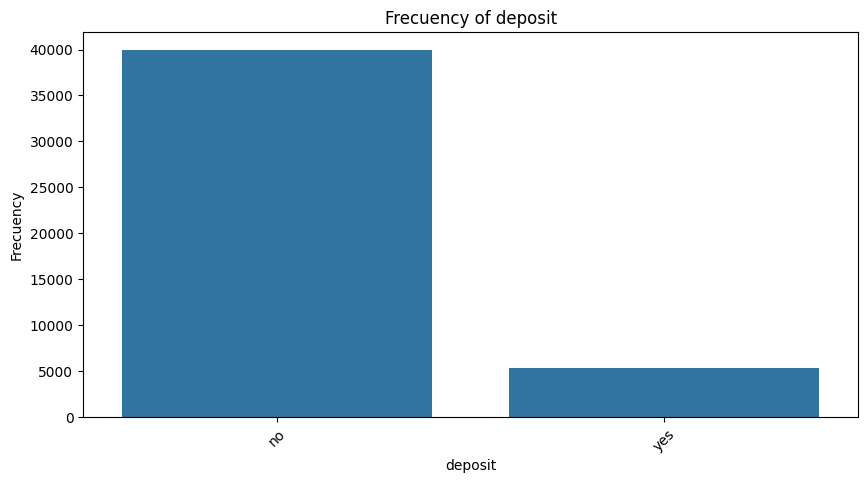

In [10]:
categorical_columns = ['marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'deposit']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=bank_dataset)
    plt.title(f'Frecuency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
    plt.xticks(rotation=45)
    plt.show()

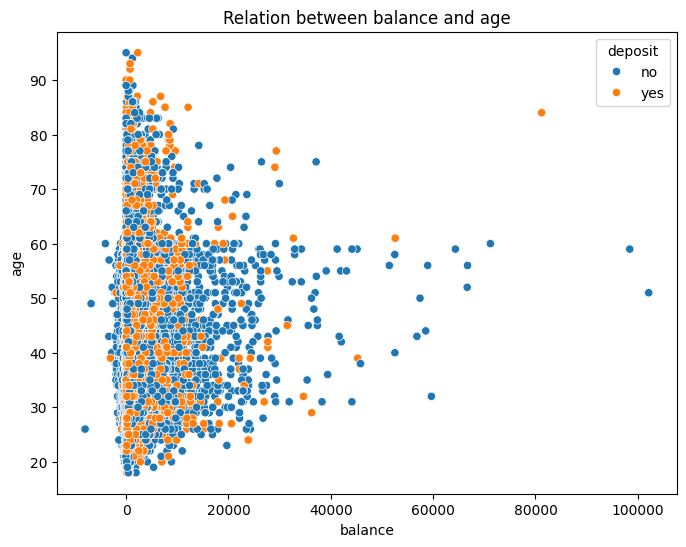

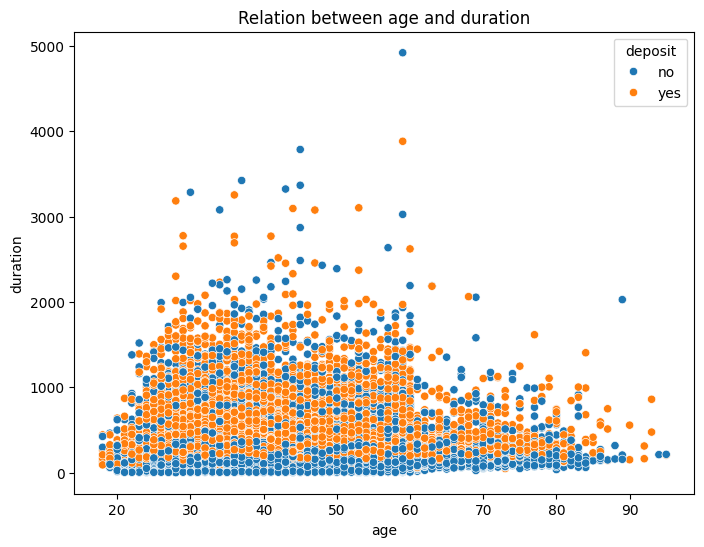

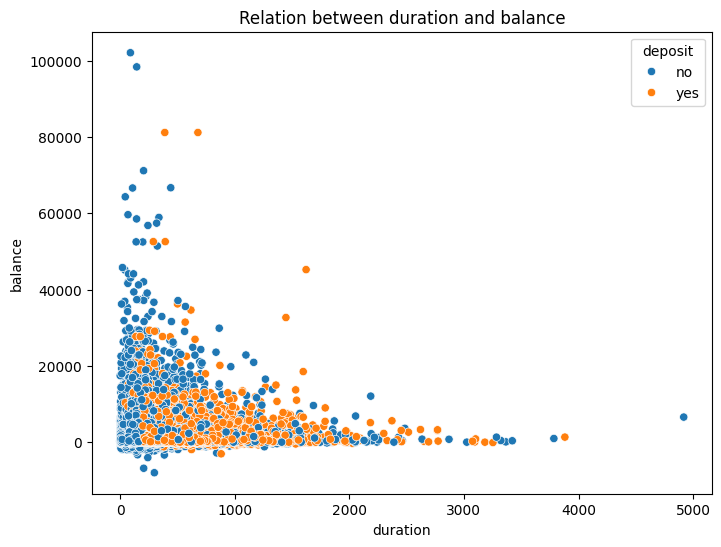

In [12]:
pairs = [('balance', 'age'), ('age', 'duration'), ('duration', 'balance')]
for x, y in pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, data=bank_dataset, hue='deposit')
    plt.title(f'Relation between {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [13]:
#Check for missing values

missing_values = bank_dataset.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [14]:
#Check for duplicated rows
duplicate_rows = bank_dataset.duplicated().sum()
print("Number of duplicated rows: ", duplicate_rows)

Number of duplicated rows:  0


**Dimensionality reduction: PCA**

In [15]:
#Apply standarization for numeric columns

numerical_cols = bank_dataset.select_dtypes(include=['float64', 'int64']).columns

bank_dataset_normalized = bank_dataset.copy()
bank_dataset_normalized[numerical_cols] = StandardScaler().fit_transform(bank_dataset_normalized[numerical_cols])

print(bank_dataset_normalized.head())


        age           job  marital  education default   balance housing loan  \
0  1.606965    management  married   tertiary      no  0.256419     yes   no   
1  0.288529    technician   single  secondary      no -0.437895     yes   no   
2 -0.747384  entrepreneur  married  secondary      no -0.446762     yes  yes   
3  0.571051   blue-collar  married    unknown      no  0.047205     yes   no   
4 -0.747384       unknown   single    unknown      no -0.447091      no   no   

   contact       day month  duration  campaign     pdays  previous poutcome  \
0  unknown -1.298476   may  0.011016 -0.569351 -0.411453  -0.25194  unknown   
1  unknown -1.298476   may -0.416127 -0.569351 -0.411453  -0.25194  unknown   
2  unknown -1.298476   may -0.707361 -0.569351 -0.411453  -0.25194  unknown   
3  unknown -1.298476   may -0.645231 -0.569351 -0.411453  -0.25194  unknown   
4  unknown -1.298476   may -0.233620 -0.569351 -0.411453  -0.25194  unknown   

  deposit  
0      no  
1      no  
2      n

In [16]:
#Apply PCA

numerical_data = bank_dataset_normalized.select_dtypes(include=['float64', 'int64'])

pca = PCA()
pca.fit(numerical_data)
explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100

for n_components, variance in enumerate(explained_variance, 1):
    print(f"{n_components} components explain {variance:.2f}% of the variance")

1 components explain 21.56% of the variance
2 components explain 38.06% of the variance
3 components explain 53.73% of the variance
4 components explain 67.66% of the variance
5 components explain 80.48% of the variance
6 components explain 92.28% of the variance
7 components explain 100.00% of the variance




---



### **USED CARS DATASET**

In [2]:
# Load dataset
cars_dataset = pd.read_csv('../resources/raw_datasets/cars.csv')
print(cars_dataset.head().to_string(index=False))
cars_dataset.shape

manufacturer           model  year  mileage                                                   engine  transmission        drivetrain fuel_type   mpg          exterior_color interior_color  accidents_or_damage  one_owner  personal_use_only                  seller_name  seller_rating  driver_rating  driver_reviews_num  price_drop   price
       Acura ILX Hybrid 1.5L  2013  92945.0 1.5L I-4 i-VTEC variable valve control, engine with 90HP     Automatic Front-wheel Drive  Gasoline 39-38                   Black      Parchment                  0.0        0.0                0.0                 Iconic Coach            NaN            4.4                12.0       300.0 13988.0
       Acura ILX Hybrid 1.5L  2013  47645.0                              1.5L I4 8V MPFI SOHC Hybrid Automatic CVT Front-wheel Drive    Hybrid 39-38                    Gray          Ebony                  1.0        1.0                1.0                   Kars Today            NaN            4.4                12.0       

(762091, 20)

As we can see the dataset has 762091 rows and 20 columns.

In [3]:
# Dataset description
print(cars_dataset.describe())

                year       mileage  accidents_or_damage      one_owner  \
count  762091.000000  7.615850e+05        737879.000000  730608.000000   
mean     2017.791398  5.578169e+04             0.228616       0.561969   
std         5.110532  4.355788e+04             0.419942       0.496145   
min      1915.000000  0.000000e+00             0.000000       0.000000   
25%      2016.000000  2.328700e+04             0.000000       0.000000   
50%      2019.000000  4.559600e+04             0.000000       1.000000   
75%      2021.000000  7.836500e+04             0.000000       1.000000   
max      2024.000000  1.119067e+06             1.000000       1.000000   

       personal_use_only  seller_rating  driver_rating  driver_reviews_num  \
count      737239.000000  548118.000000  730459.000000       762091.000000   
mean            0.657212       4.158568       4.623523           89.550900   
std             0.474642       0.805741       0.276902          115.082266   
min             0.000

#### **DATA CLEANING**


---



##### **1. Missing values**

In [4]:
#Check for missing values

missing_values = cars_dataset.isnull().sum()
print(missing_values)

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64


As we can see we have a lot of missing values. We decide to drop every instance with any missing values. Now the dataset has 243500 instances.

In [5]:
# Delete instance with missing values
cars_dataset = cars_dataset.dropna()
cars_dataset.shape

(243500, 20)

In [6]:
# Now check if there is more missing values
missing_values = cars_dataset.isnull().sum()
print(missing_values)

manufacturer           0
model                  0
year                   0
mileage                0
engine                 0
transmission           0
drivetrain             0
fuel_type              0
mpg                    0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
seller_rating          0
driver_rating          0
driver_reviews_num     0
price_drop             0
price                  0
dtype: int64


##### **2. Duplicated values**

In [7]:
# Check for duplicated rows
duplicate_rows = cars_dataset.duplicated().sum()
print("Number of duplicated rows: ", duplicate_rows)


Number of duplicated rows:  2243


Now the dataset has 2243 duplicated rows, lets fix this.

In [8]:
# Drop duplicated rows
cars_dataset = cars_dataset.drop_duplicates()
cars_dataset.shape

(241257, 20)

The dataset reduce into 241257 instances.

In [9]:
# Check if the problem has been fixed
duplicate_rows = cars_dataset.duplicated().sum()
print("Number of duplicated rows: ", duplicate_rows)

Number of duplicated rows:  0


##### **2.2. Data Transformations**

In [10]:
# Transform boolean values
boolean_columns = ['accidents_or_damage', 'one_owner', 'personal_use_only']

# Replace 0 with "no" and 1 with "yes" in specified columns
cars_dataset[boolean_columns] = cars_dataset[boolean_columns].replace({0: "No", 1: "Yes"})
print(cars_dataset.head().to_string(index=False))

manufacturer           model  year  mileage                                engine   transmission        drivetrain fuel_type   mpg          exterior_color interior_color accidents_or_damage one_owner personal_use_only                     seller_name  seller_rating  driver_rating  driver_reviews_num  price_drop    price
       Acura ILX Hybrid 1.5L  2013  53422.0           1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT Front-wheel Drive    Hybrid 39-38   Bellanova White Pearl          Ebony                  No       Yes               Yes    Weiss Toyota of South County            4.3            4.4                12.0       500.0  17000.0
       Acura ILX Hybrid 1.5L  2013  62042.0           1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT Front-wheel Drive    Hybrid 39-38 Polished Metal Metallic          Ebony                  No        No               Yes                      Kalidy Kia            2.2            4.4                12.0       109.0  18000.0
       Acura           NSX T  2001  2

##### **3. Noisy data**

And now lets plot some graph to see if there is any noisy data.

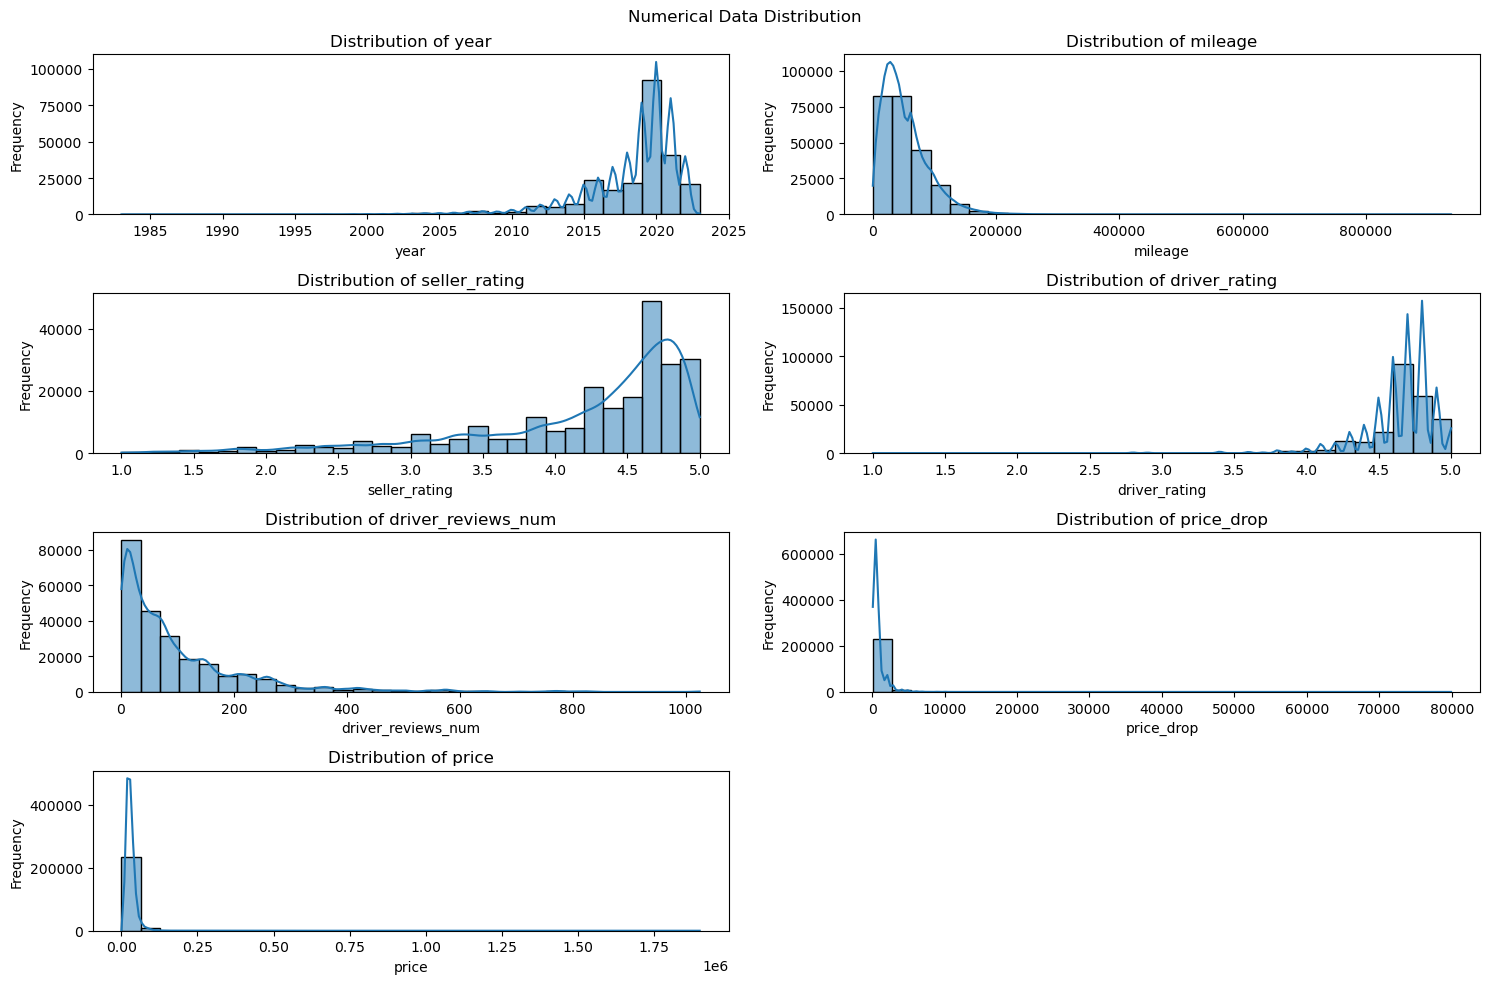

In [11]:
# Histplot for numerical columns
numeric_columns = ['year', 'mileage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']

plt.figure(figsize=(15, 10))

# Loop over each column and plot in a grid
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(4,2,i)
    sns.histplot(cars_dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle("Numerical Data Distribution")
plt.tight_layout()
plt.show()

Graph Analysis

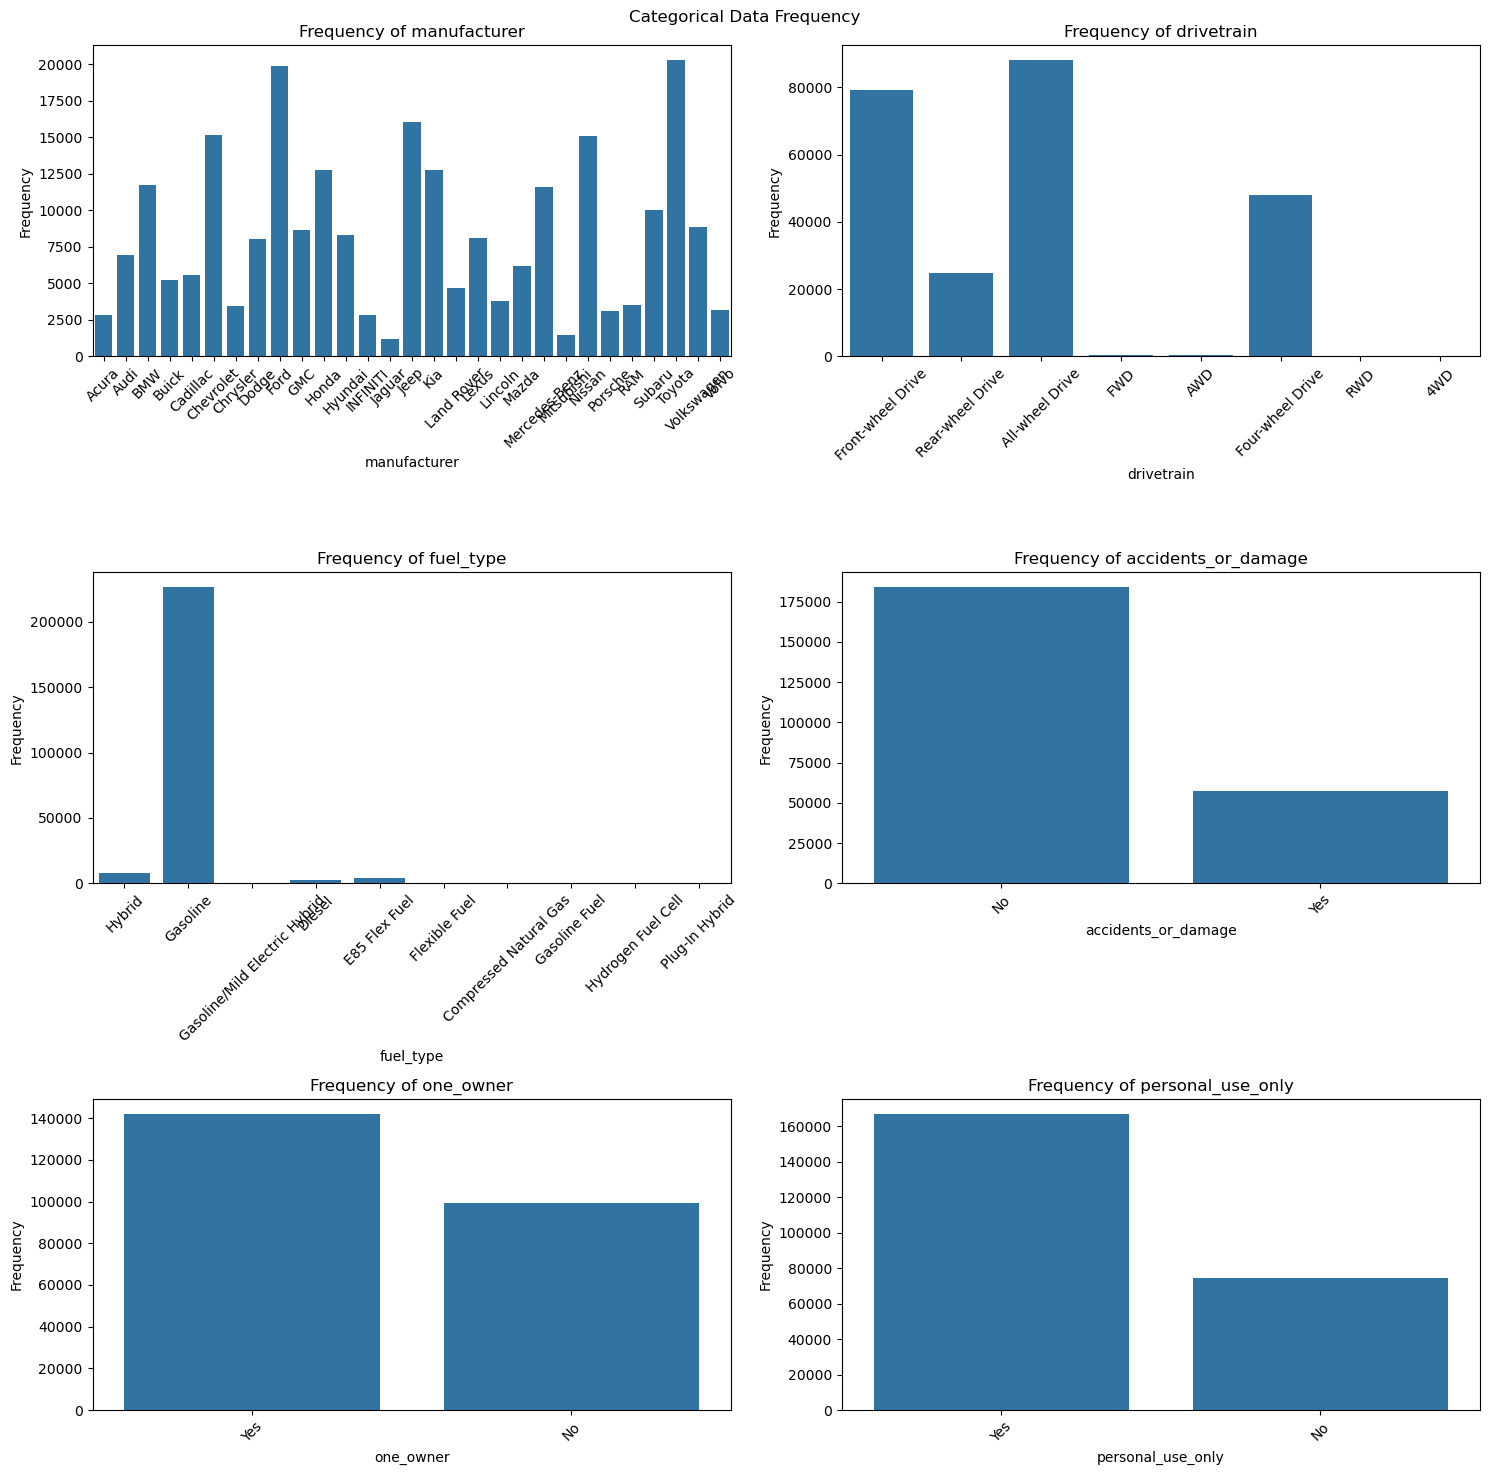

In [12]:
# Count plot for categorical columns
categorical_columns = ['manufacturer', 'drivetrain', 'fuel_type', 'accidents_or_damage', 'one_owner', 'personal_use_only']

plt.figure(figsize=(15, 15))

for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(3,2,i)
    sns.countplot(x=col, data=cars_dataset)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.suptitle("Categorical Data Frequency")
plt.tight_layout()
plt.show()

In [11]:
#Bad drivetrain
unique_drivetrain = cars_dataset['drivetrain'].unique()
print(unique_drivetrain)

['Front-wheel Drive' 'Rear-wheel Drive' 'All-wheel Drive' 'FWD' 'AWD'
 'Four-wheel Drive' 'RWD' '4WD']


In [12]:
# Let's fix this
cars_dataset["drivetrain"] = cars_dataset["drivetrain"].replace({"FWD": "Front-wheel Drive", "AWD": "All-wheel Drive", "RWD":"Rear-wheel Drive", "4WD":"Four-wheel Drive"})
unique_drivetrain = cars_dataset['drivetrain'].unique()
print(unique_drivetrain)

['Front-wheel Drive' 'Rear-wheel Drive' 'All-wheel Drive'
 'Four-wheel Drive']


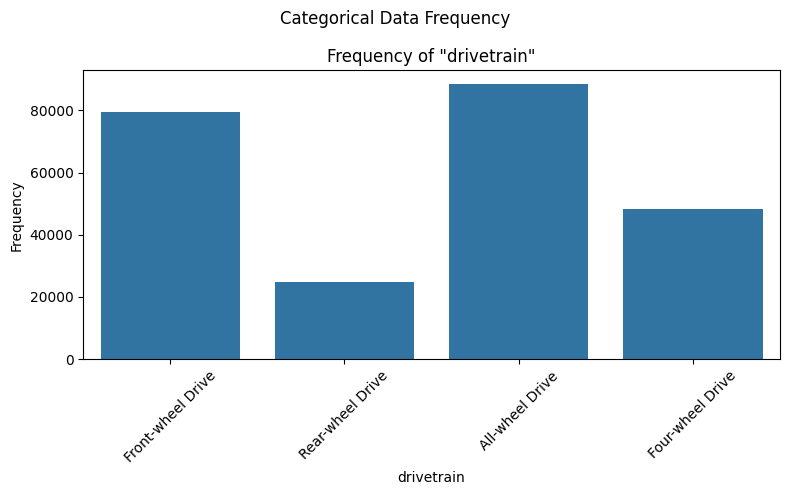

In [13]:
# Let's plot the countplot again
plt.figure(figsize=(8, 5))

sns.countplot(x="drivetrain", data=cars_dataset)
plt.title(f'Frequency of "drivetrain"')
plt.xlabel("drivetrain")
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.suptitle("Categorical Data Frequency")
plt.tight_layout()
plt.show()

Graph Analysis

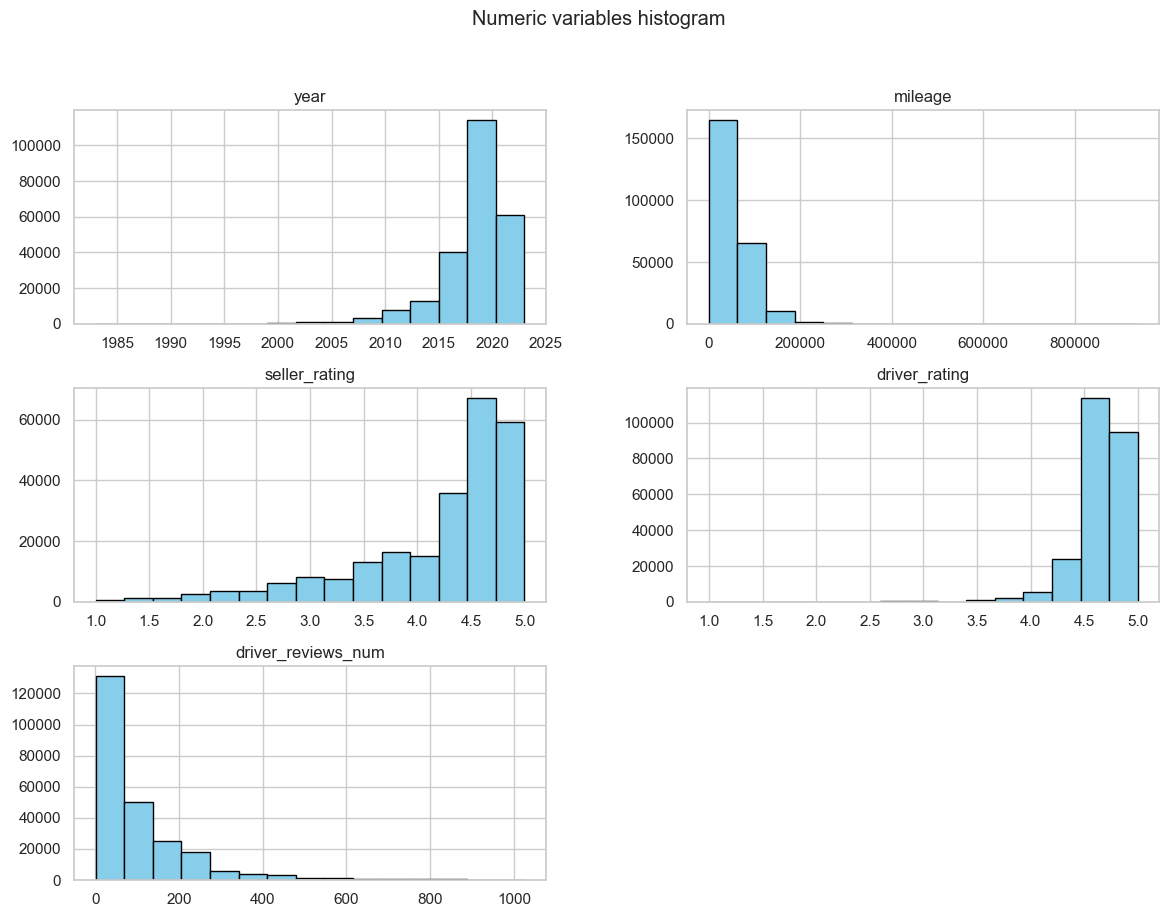

In [13]:
# Histogram between numeric columns
sns.set(style="whitegrid")
df_numeric = cars_dataset.select_dtypes(include=['float64', 'int64']).drop(columns=['price_drop', 'price'])
df_numeric.hist(bins=15, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Numeric variables histogram")
plt.show()

Having displayed the frequencies and distribution of the data attributes of the dataset. We would proceed to eliminate the outliers that could harm the future model, based on the Tukey Method

In [14]:
def remove_outliers_tukey(data, columns):
    outlier_counter = {}
    original_data = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = original_data[(original_data[column] < lower_bound) | (original_data[column] > upper_bound)]
        outlier_counter[column] = outliers.shape[0]

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data, outlier_counter

numeric_columns = ['year', 'mileage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']

cars_dataset_cleaned, outlier_counter = remove_outliers_tukey(cars_dataset, numeric_columns)
outlier_counter = pd.DataFrame(list(outlier_counter.items()), columns = ['Column', 'Outliers'])

print("\nNUMBER OUTLIERS CLEANED BY COLUMN: ")
print(outlier_counter.to_string(index=False))
print("\nFINAL CLEANED DATASET DIMENSIONS:")
print(cars_dataset_cleaned.shape)



NUMBER OUTLIERS CLEANED BY COLUMN: 
            Column  Outliers
              year      7107
           mileage      8194
     seller_rating     15152
     driver_rating     13278
driver_reviews_num     12516
        price_drop     18782
             price     11195

FINAL CLEANED DATASET DIMENSIONS:
(170219, 20)


##### **4. PCA**

**PERFORM PCA TO THE DATASET**

In [15]:
# First normalized numerical data
norm_cols = cars_dataset.select_dtypes(include=['float64', 'int64']).columns

cars_dataset_normalized = cars_dataset.copy()
cars_dataset_normalized[norm_cols] = StandardScaler().fit_transform(cars_dataset_normalized[norm_cols])

print(cars_dataset_normalized.head())
cars_dataset_normalized.columns

   manufacturer            model      year   mileage  \
2         Acura  ILX Hybrid 1.5L -1.679814  0.034136   
5         Acura  ILX Hybrid 1.5L -1.679814  0.264795   
13        Acura            NSX T -5.392828 -0.626480   
14        Acura         NSX Base -0.442142 -0.969792   
15        Acura            NSX T -6.321081  0.814952   

                                   engine    transmission         drivetrain  \
2             1.5L I4 8V MPFI SOHC Hybrid   Automatic CVT  Front-wheel Drive   
5             1.5L I4 8V MPFI SOHC Hybrid   Automatic CVT  Front-wheel Drive   
13                  3.2L V6 24V MPFI DOHC  6-Speed Manual   Rear-wheel Drive   
14  Twin Turbo Gas/Electric V-6 3.5 L/213       Automatic    All-wheel Drive   
15                  3.2L V6 24V MPFI DOHC  6-Speed Manual   Rear-wheel Drive   

   fuel_type    mpg           exterior_color interior_color  \
2     Hybrid  39-38    Bellanova White Pearl          Ebony   
5     Hybrid  39-38  Polished Metal Metallic          Eb

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

In [16]:
# Apply PCA
norm_data = cars_dataset_normalized.select_dtypes(include=['float64', 'int64'])

pca = PCA()
pca.fit(norm_data)
explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100

for n_components, variance in enumerate(explained_variance, 1):
    print(f"{n_components} components explain {variance:.2f}% of the variance")

1 components explain 31.82% of the variance
2 components explain 48.06% of the variance
3 components explain 62.03% of the variance
4 components explain 75.55% of the variance
5 components explain 87.32% of the variance
6 components explain 95.51% of the variance
7 components explain 100.00% of the variance


**DATA CLEANING CONCLUSION**

1. Missing values: there was a lot of missing values. To fix it every instances with a missing values has been dropped. So the dataset reduced to 243500 instaces.
2. Duplicated rows: there are 2243 duplicated row so after deleting repeting rows the dataset has 241257 instances.
3. Noisy data: after cleaning this we create some graph to check if there is any noisy data.
4. Feature selection:

# ✅ TASK INSTRUCTIONS

For each task:
*   Use the different algorithms that we have seen in class to solve it.
*   Use multiple hyperparameter configurations for each algorithm and find the
best one for your problem.
*   Evaluate the different algorithms and configurations using the metrics that we have seen in class.
*   Select the best solution.
*   Discuss why is the best solution and extract conclusions.

**Not doing this for each task will result in failing that task.**

The most important part for me is for you to show your reasoning
process and to discuss each step. That is what I will look at when
evaluating the project.

# 🛑 Task 1: Classification: Deposit subscription predictor




**GOAL:** The aim of this task is to train a model capable of predicting whether a person will make a deposit in the bank after having participated in a marketing campaign, achieving the best ratio between accuracy and number of features selected.


In [17]:
#Check if deposit is imbalanced

deposit_percentage = bank_dataset['deposit'].value_counts(normalize=True) * 100
print(deposit_percentage)


deposit
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


**CART ALGORITHM**

In [18]:
#Create a function to find the best threshold for F1 score (as it is imbalanced)
def find_best_thres(true_y, prob_y):
    f1_scores = []
    thhold = np.linspace(0, 1, 100)
    for th in thhold:
        pred_y = (prob_y >= th).astype(int)
        f1 = f1_score(true_y, pred_y)
        f1_scores.append(f1)
    best_idx = np.argmax(f1_scores)
    best_th = thhold[best_idx]
    
    return best_th

#Create dummy variables for each categorical column
categorical_cols = bank_dataset_normalized.select_dtypes(include=['object']).columns.drop('deposit')
bank_dataset_dummy = pd.get_dummies(bank_dataset_normalized, columns=categorical_cols, drop_first=True)

#We have to separate the target variable (deposit) from the other features
X = bank_dataset_dummy.drop('deposit', axis=1)
y = bank_dataset_dummy['deposit'].map({'no': 0, 'yes': 1})

#Now split the dataset into training and test sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

#Define hyperparameter grid for testing
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': [None, 'balanced']}

#Define scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)
results_summary = []

#Check the best hyperparameters and metrics for each PCA
for n_components in [None] + list(range(1, 8)):  #None means no PCA
    steps = []
    if n_components is not None:
        steps.append(('pca', PCA(n_components=n_components, random_state=17)))
    else:
        steps.append(('pca', 'passthrough'))
    steps.append(('classifier', DecisionTreeClassifier(random_state=17)))
    pipeline = Pipeline(steps=steps)
    
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1',
        cv=cv,
        n_jobs=-1, #We included this for using all of our available CPU cores
        return_train_score=True)
    grid_search.fit(X_train, y_train)
    best_pipeline = grid_search.best_estimator_
    
    avg_res = cross_validate(
        best_pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring=scoring_metrics,
        return_train_score=False)
    avg_res_mean = {metric: np.mean(avg_res[f'test_{metric}']) for metric in scoring_metrics.keys()}
    
    y_test_prob = best_pipeline.predict_proba(X_test)[:, 1]
    best_threshold = find_best_thres(y_test, y_test_prob)
    y_test_best_pred = (y_test_prob >= best_threshold).astype(int)
    
    test_f1 = f1_score(y_test, y_test_best_pred)
    test_precision = precision_score(y_test, y_test_best_pred)
    test_recall = recall_score(y_test, y_test_best_pred)
    test_accuracy = accuracy_score(y_test, y_test_best_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    
    results_summary.append({
        'n_components': n_components if n_components is not None else 'No PCA',
        'best_params': grid_search.best_params_,
        'metrics': {
            'accuracy': test_accuracy,
            'f1': test_f1,
            'precision': test_precision,
            'recall': test_recall,
            'roc_auc': test_roc_auc},
        'average_cv_metrics': avg_res_mean,
        'best_threshold': best_threshold})

#Find the best result based on F1 score
best_result = max(results_summary, key=lambda x: x['metrics']['f1'])

for result in results_summary:
    print(f"\nPCA Components: {result['n_components']}")
    print(f"Best params: {result['best_params']}")
    print(f"Best threshold: {result['best_threshold']:.2f}")
    for metric, value in result['metrics'].items():
        print(f"{metric.capitalize()}: {value:.4f}")

print("\nBEST CONFIGURATION:")
print(f"PCA Components: {best_result['n_components']}")
print(f"Best params: {best_result['best_params']}")
print(f"Best threshold: {best_result['best_threshold']:.2f}")
for metric, value in best_result['metrics'].items():
    print(f"{metric.capitalize()}: {value:.4f}")


/home/alvaro/miniforge3/envs/rapids-24.10/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



PCA Components: No PCA
Best params: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Best threshold: 0.76
Accuracy: 0.8862
F1: 0.5882
Precision: 0.5101
Recall: 0.6947
Roc_auc: 0.8297

PCA Components: 1
Best params: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Best threshold: 0.56
Accuracy: 0.7399
F1: 0.3017
Precision: 0.2199
Recall: 0.4802
Roc_auc: 0.6636

PCA Components: 2
Best params: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Best threshold: 0.54
Accuracy: 0.7754
F1: 0.3339
Precision: 0.2557
Recall: 0.4811
Roc_auc: 0.6955

PCA Components: 3
Best params: {'classifier__class_weight': 'balanced', 'clas

**RANDOM FOREST ALGORITHM**

In [ ]:
#Create a function to find the best threshold for F1 score (as it is imbalanced)
def find_best_thres(true_y, prob_y):
    f1_scores = []
    thhold = np.linspace(0, 1, 100)
    for th in thhold:
        pred_y = (prob_y >= th).astype(int)
        f1 = f1_score(true_y, pred_y)
        f1_scores.append(f1)
    best_idx = np.argmax(f1_scores)
    best_th = thhold[best_idx]
    
    return best_th

#Create dummy variables for each categorical column
categorical_cols = bank_dataset_normalized.select_dtypes(include=['object']).columns.drop('deposit')
bank_dataset_dummy = pd.get_dummies(bank_dataset_normalized, columns=categorical_cols, drop_first=True)

#We have to separate the target variable (deposit) from the other features
X = bank_dataset_dummy.drop('deposit', axis=1)
y = bank_dataset_dummy['deposit'].map({'no': 0, 'yes': 1})

#Now split the dataset into training and test sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)
rf_classifier = RandomForestClassifier(random_state=17)

#Define the hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']}

#Define the metrics 
scoring = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc'}

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=17)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1, #Added for using all CPU cores (not for colab)
    return_train_score=True,
    refit='f1'  #Optimize F1 
    )


grid_search.fit(X_train, y_train)

#Print the results for each combination of hyperparameters
cv_results = pd.DataFrame(grid_search.cv_results_)
print("-" * 50)

for idx, row in cv_results.iterrows():
    params = row['params']
    mean_test_f1 = row['mean_test_f1']
    mean_test_precision = row['mean_test_precision']
    mean_test_recall = row['mean_test_recall']
    mean_test_accuracy = row['mean_test_accuracy']
    mean_test_roc_auc = row['mean_test_roc_auc']

    print(f"Iteration {idx + 1}:")
    print(f"Hyperparameters: {params}")
    print(f"Mean F1 score: {mean_test_f1:.4f}")
    print(f"Mean precision: {mean_test_precision:.4f}")
    print(f"Mean recall: {mean_test_recall:.4f}")
    print(f"Mean accuracy: {mean_test_accuracy:.4f}")
    print(f"Mean ROC AUC: {mean_test_roc_auc:.4f}")
    print("-" * 50)

#Get the best model and hyperparameters
best_rf = grid_search.best_estimator_
print(f"\nBest hyperparameters: {grid_search.best_params_}")
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

#Find the best threshold
best_threshold = find_best_thres(y_test, y_test_prob)
print(f"\nBest threshold: {best_threshold:.2f}")

#Calculate the metrics for the best threshold
y_test_best_pred = (y_test_prob >= best_threshold).astype(int)
test_f1 = f1_score(y_test, y_test_best_pred)
test_precision = precision_score(y_test, y_test_best_pred)
test_recall = recall_score(y_test, y_test_best_pred)
test_accuracy = accuracy_score(y_test, y_test_best_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)

print("\nFINAL RESULTS WITH BEST THRESHOLD:")
print(f"F1 score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC: {test_roc_auc:.4f}")



---



# 🛑 Task 2: REGRESSION: Used car price estimator



**DESCRIPTION**

---

This task aims to predict the **Used car price rate** based on the data of the *cars.csv*. In order to accomplush that variables such as number of milles traveled, production year, original price, etc. would be analysed. This prediction can help

**ROAD MAP**

---

So as to predict the Satisfaction Rate of employees the different regression methods listed below would be seen:
- Linear and Polynomial regression (Aimar?)
- Support Vector Regression (Aimar)
- Decision Tree Regression (Irune)
- Random Forest regression
- Ridge regression
- Lasso regression

For each one of these algorithms we would use multiple hyperparameter configurations, trying to find the best one for your problem, while evaluating them using distinct metrics.


**Notes** "*Luego se quita*"

*Basic regression methods: linear, polynomial, generalized linear, quantile*

*Other: Support Vector, Stochastics Gradient Descent, Nearest neighbor, gaussian process, decision tree*

*Robust methods: RANSAC, Theil Sen and HuberRegressor*

*Evaluation means:
MAE, MAPE, RMSE, R2, Adjusted R2*

### **DATA PREPARATION**

---

*""EXPLICACIÓN DE LA VARIABLE SELECTION, SUBSET MÍNIMO, OTRAS A ESTUDIAR..."*

#### **INDEPENDENT VARIABLE ANALYSIS**

In [17]:
cars = cars_dataset_cleaned
independent_numerical_variables = ['year', 'mileage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop']
independent_categorical_variables = ['manufacturer', 'transmission', 'drivetrain', 'fuel_type', 'accidents_or_damage', 'one_owner', 'personal_use_only', 'mpg', 'model', 'engine', 'exterior_color', 'interior_color']

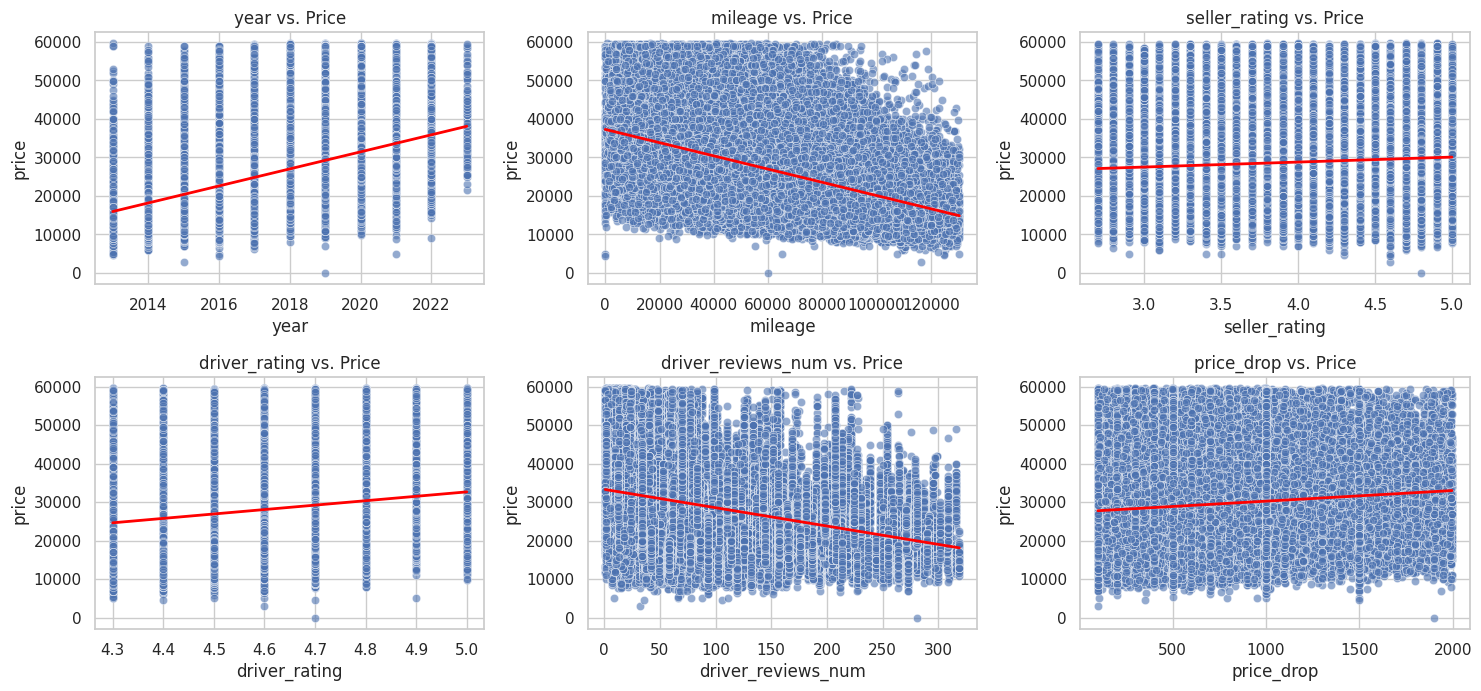

In [ ]:
#INDIVIDUAL ANALYSIS OF INDEPENDENT NUMERICAL VARIABLES vs TARGER VARIABLE (price)
numerical_data = cars[independent_numerical_variables + ['price']]

plt.figure(figsize=(15, 10))

for i, var in enumerate(independent_numerical_variables, start=1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=numerical_data, x=var, y='price', alpha=0.6)
    plt.title(f'{var} vs. Price')
    plt.xlabel(var)
    plt.ylabel('Price')
    sns.regplot(data=numerical_data, x=var, y='price', scatter=False, color='red', line_kws={'lw': 2}, ci=95)

plt.suptitle("Individual Analysis of Independent Numerical Variables vs. Taget Variable (Price)")
plt.tight_layout()
plt.show()

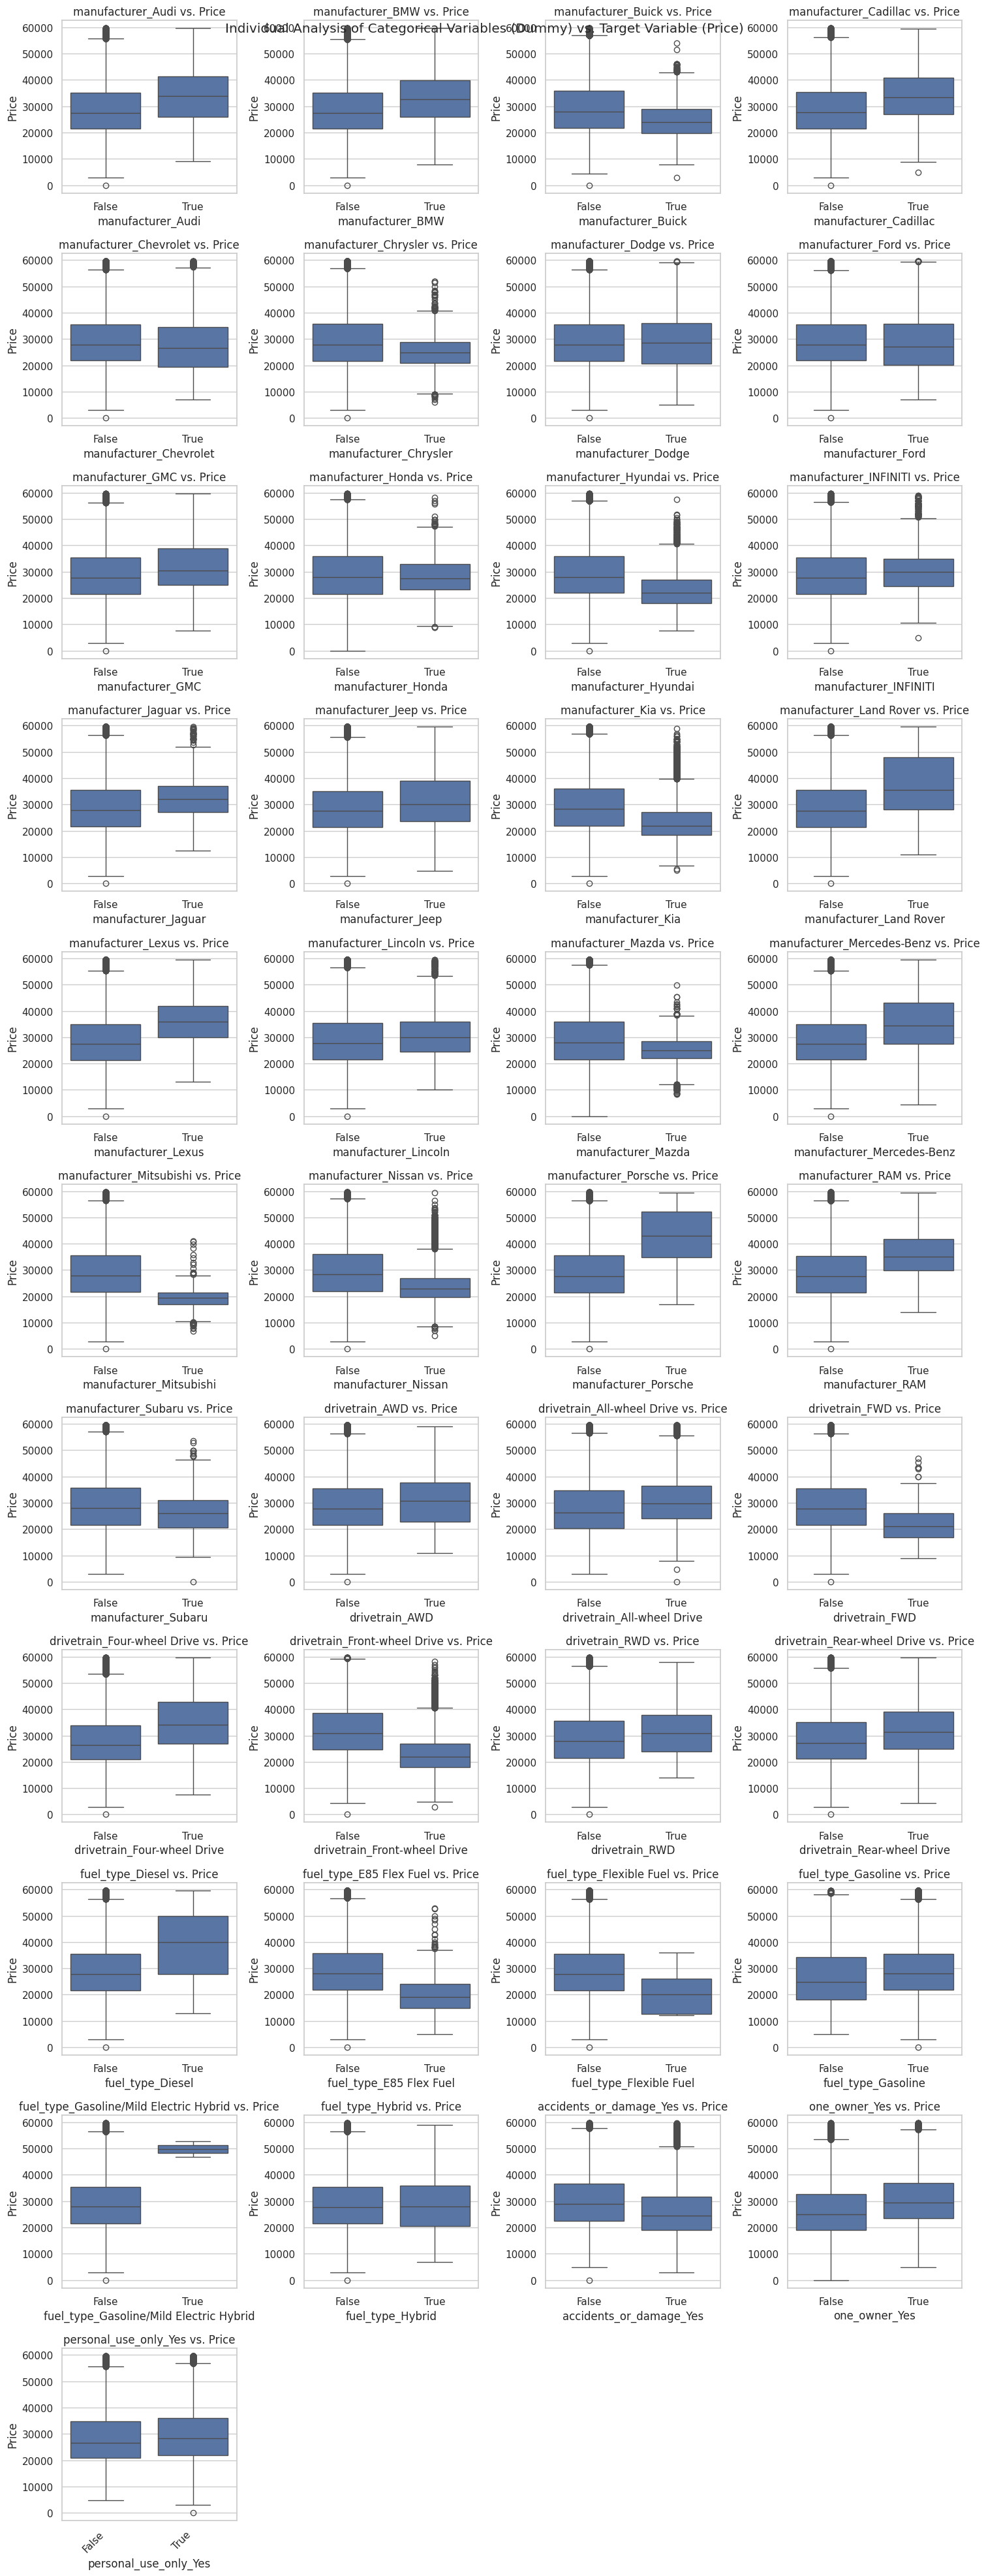

In [ ]:
#INDIVIDUAL ANALYSIS OF INDEPENDENT NUMERICAL VARIABLES vs TARGER VARIABLE (price)
categorical_data = cars[independent_categorical_variables]
categorical_data = pd.get_dummies(categorical_data, independent_categorical_variables, drop_first=True)
dummy_variables = categorical_data.columns

categorical_data['price'] = cars['price']

plt.figure(figsize=(15, 40))

for i, var in enumerate(dummy_variables, start=1):
    plt.subplot(11, 4, i)
    sns.boxplot(data=categorical_data, x=var, y='price')
    plt.title(f'{var} vs. Price')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.suptitle("Individual Analysis of Categorical Variables (Dummy) vs. Target Variable (Price)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **INDEPENDENT VARIABLE SELECTION**

In [18]:
def calculate_metrics(y_test, y_pred, predictors):
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    n = len(y_test)
    adjusted_r2 = 1 - (((n-1)*(1-r2))/(n-predictors-1))

    return [mae, mape, mse, rmse, r2, adjusted_r2] #{'MAE':mae, 'MAPE':mape, 'MSE':mse, 'RMSE':rmse, 'R Square':r2, 'Adjusted R2': adjusted_r2}

In [19]:
#Minimal variable subset
min_numerical = ['year', 'mileage']
min_categorical = ['transmission', 'drivetrain', 'fuel_type', 'mpg']
min_model = min_numerical + min_categorical

#Other variables to consider in the model
other_numerical = ['price_drop', 'driver_reviews_num', 'seller_rating', 'driver_rating']
other_categorical = ['manufacturer', 'accidents_or_damage', 'one_owner', 'personal_use_only', 'model', 'engine', 'exterior_color', 'interior_color']
others_model = other_numerical + other_categorical

cars_prepared = pd.get_dummies(cars, columns=independent_categorical_variables, drop_first=True)
results = []

def get_dummy_names(categorical_vars):
  names = []
  for var in categorical_vars:
    names.extend([col for col in cars_prepared.columns if col.startswith(var + "_")])
  return names

# Reference results of the basic model
y = cars_prepared['price']
X = cars_prepared[min_numerical + get_dummy_names(min_categorical)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

model_metrics = calculate_metrics(y_test, y_pred, len(min_model))
model_metrics.insert(0, 'Basic model')
results.append(model_metrics)

# Results of combinations of other considerable variables
min_model_col_names = min_numerical + get_dummy_names(min_categorical)

for variable in others_model:

    if variable in other_categorical:
        dummy_columns = [col for col in cars_prepared.columns if col.startswith(variable + '_')]
        features = min_model_col_names + dummy_columns
    else:
        features = min_model_col_names + [variable]

    y = cars_prepared['price']
    X = cars_prepared[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)

    model_metrics = calculate_metrics(y_test, y_pred, len(min_model) +1)
    model_metrics.insert(0, f'Basic model + {variable}')
    results.append(model_metrics)

overall_results = pd.DataFrame(results, columns=['Name', 'MAE', 'MAPE', 'MSE', 'RMSE', 'R SQUARE', 'ADJUSTED R SQUARE']).sort_values(by='ADJUSTED R SQUARE', ascending=False)
print(overall_results.to_string())


                                 Name           MAE          MAPE           MSE          RMSE      R SQUARE  ADJUSTED R SQUARE
9                 Basic model + model  1.913772e+03  6.218851e+00  7.639613e+06  2.763985e+03  9.345996e-01       9.342086e-01
10               Basic model + engine  2.324238e+03  7.416793e+00  9.594501e+06  3.097499e+03  9.178643e-01       9.173734e-01
12       Basic model + interior_color  2.690299e+03  8.683322e+00  1.392335e+07  3.731401e+03  8.808063e-01       8.800938e-01
6   Basic model + accidents_or_damage  2.814630e+03  9.200056e+00  1.507152e+07  3.882206e+03  8.709772e-01       8.702059e-01
4         Basic model + driver_rating  2.819103e+03  9.207549e+00  1.515624e+07  3.893102e+03  8.702519e-01       8.694763e-01
8     Basic model + personal_use_only  2.827205e+03  9.246724e+00  1.518529e+07  3.896831e+03  8.700033e-01       8.692262e-01
5          Basic model + manufacturer  2.828549e+03  9.264550e+00  1.520043e+07  3.898772e+03  8.698737e-01    

In [ ]:
print(overall_results.iloc[0])

Name                 Basic model + model
MAE                          2060.712256
MAPE                            7.351211
MSE                       8228503.892311
RMSE                         2868.536891
R SQUARE                        0.931369
ADJUSTED R SQUARE               0.931303
Name: 9, dtype: object


Using this logic lets create a function to do the feature selection. This fuction will take the best feature (Highest Adjusted R2) and add it to the basic model interactively until the basic model comes first.

In [19]:
#Initialize the variable subsets again
#Minimal variable subset
min_numerical = ['year', 'mileage']
min_categorical = ['transmission', 'drivetrain', 'fuel_type', 'mpg']
min_model = min_numerical + min_categorical

#Other variables to consider in the model
other_numerical = ['price_drop', 'driver_reviews_num', 'seller_rating', 'driver_rating']
other_categorical = ['manufacturer', 'accidents_or_damage', 'one_owner', 'personal_use_only', 'model', 'engine', 'exterior_color', 'interior_color']
others_model = other_numerical + other_categorical

cars_prepared = pd.get_dummies(cars, columns=independent_categorical_variables, drop_first=True)

In [20]:
# Complemmentary functions
# Get categorical dummy variables names
def get_dummy_names(cars_prepared, categorical_vars):
    names = []
    for var in categorical_vars:
        names.extend([col for col in cars_prepared.columns if col.startswith(var + "_")])
    return names
# To print dummy variables on a single line
def get_feature_summary(features):
    grouped_features = []
    processed_prefixes = set()

    dummy_groups = ['transmission', 'drivetrain', 'fuel_type', 'mpg', 'manufacturer',
                    'accidents_or_damage', 'one_owner', 'personal_use_only',
                    'model', 'engine', 'exterior_color', 'interior_color']

    for feature in features:
        matched_group = next((group for group in dummy_groups if feature.startswith(group)), None)

        if matched_group:
            if matched_group not in processed_prefixes:
                grouped_features.append(f"{matched_group} (dummies)")
                processed_prefixes.add(matched_group)
        else:
            grouped_features.append(feature)

    return ", ".join(grouped_features)

In [21]:
def feature_selection_loop(cars_prepared, min_numerical, min_categorical, others_model, min_model):
    # Initial basic model
    min_model_col_names = min_numerical + get_dummy_names(cars_prepared, min_categorical)
    y = cars_prepared['price']
    X = cars_prepared[min_model_col_names]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regr = LinearRegression(n_jobs=-1)  # Use available cores
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)

    model_metrics = calculate_metrics(y_test, y_pred, len(min_model_col_names))
    model_metrics.insert(0, 'Basic model')
    results = [model_metrics]

    remaining_features = others_model.copy()
    iteration = 1  # Iteration counter

    while True:
        print(f"\nIteration {iteration}")
        print(f"Current features in the basic model: {get_feature_summary(min_model_col_names)}")
        print(f"Remaining features to consider: {', '.join(remaining_features)}\n")

        best_metric = None
        best_feature = None

        for variable in remaining_features:
            if variable in other_categorical:
                dummy_columns = [col for col in cars_prepared.columns if col.startswith(variable + '_')]
                features = min_model_col_names + dummy_columns
            else:
                features = min_model_col_names + [variable]

            X = cars_prepared[features]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

            regr.fit(X_train, y_train)
            y_pred = regr.predict(X_test)
            model_metrics = calculate_metrics(y_test, y_pred, len(features))
            model_metrics.insert(0, f'Basic model + {variable}')

            if best_metric is None or model_metrics[-1] > best_metric[-1]:
                best_metric = model_metrics
                best_feature = variable

        if best_feature:
            print(f"Variable '{best_feature}' has the best adjusted R² ({best_metric[-1]:.4f}). Adding it to the basic model.")
            print("-" * 60) 
            iteration += 1  

            results.append(best_metric)
            min_model_col_names += [best_feature] if best_feature in other_numerical else get_dummy_names(cars_prepared, [best_feature])
            remaining_features.remove(best_feature)

            # Order result 
            overall_results = pd.DataFrame(results, columns=['Name', 'MAE', 'MAPE', 'MSE', 'RMSE', 'R SQUARE', 'ADJUSTED R SQUARE']).sort_values(by='ADJUSTED R SQUARE', ascending=False)
            print(overall_results.to_string(index=False))

            # Check if the Basic model is now the best
            if overall_results.iloc[0]['Name'] == 'Basic model':
                print("\nThe Basic model is now the best according to Adjusted R². Stopping feature selection.")
                break
        else:
            print("\nNo further improvement could be made.")
            break

    # final set of features
    print("\nFinal set of features in the resulting dataset:")
    print(get_feature_summary(min_model_col_names))
    # Final set of resultant features
    print("\nFinal metrics result:")
    print(overall_results.iloc[0])

    return min_model_col_names

final_model_col_names = feature_selection_loop(cars_prepared, min_numerical, min_categorical, others_model, min_model)


Iteration 1
Current features in the basic model: year, mileage, transmission (dummies), drivetrain (dummies), fuel_type (dummies), mpg (dummies)
Remaining features to consider: price_drop, driver_reviews_num, seller_rating, driver_rating, manufacturer, accidents_or_damage, one_owner, personal_use_only, model, engine, exterior_color, interior_color

Variable 'manufacturer' has the best adjusted R² (0.8095). Adding it to the basic model.
------------------------------------------------------------
                      Name         MAE      MAPE          MSE        RMSE  R SQUARE  ADJUSTED R SQUARE
Basic model + manufacturer 3331.901822 12.457199 1.975356e+07 4444.497632  0.813299           0.809545
               Basic model 3852.491092 14.062340 2.684881e+07 5181.583691  0.746238           0.741353

Iteration 2
Current features in the basic model: year, mileage, transmission (dummies), drivetrain (dummies), fuel_type (dummies), mpg (dummies), manufacturer (dummies)
Remaining features 

In [ ]:
#Definitive useful columns for the model (HARDCODED)
# Numeric features
min_model_col_namesH = [
    'year', 
    'mileage'
]

# Catagorical features
categorical_vars = [
    'transmission', 'drivetrain', 'fuel_type', 'mpg', 'manufacturer',
    'model', 'engine', 'interior_color'
]

cars_prepared = pd.get_dummies(cars, columns=categorical_vars, drop_first=True)

def get_dummy_names(categorical_vars):
  names = []
  for var in categorical_vars:
    names.extend([col for col in cars_prepared.columns if col.startswith(var + "_")])
  return names


dummy_columns = get_dummy_names(categorical_vars)
hardcoded_final_features = min_model_col_namesH + dummy_columns

print("Hardcoded final features:")
for feature in hardcoded_final_features:
    print(feature)

# Dataframe for independent variables
X_final = cars_prepared[hardcoded_final_features]

Hardcoded final features:
year
mileage
driver_rating
driver_reviews_num
seller_rating
transmission_1-Speed Automatic
transmission_1-Speed CVT with Overdrive
transmission_10 speed automatic
transmission_10-SPEED A/T
transmission_10-Speed A/T
transmission_10-Speed Automatic
transmission_10-Speed Automatic with Overdrive
transmission_10-Speed Manual
transmission_10-Speed Shiftable Automatic
transmission_4 DOOR
transmission_4-Speed Automatic
transmission_4-Speed Automatic Electronic Enhanced
transmission_4-Speed Automatic VLP
transmission_4-Speed Automatic with Overdrive
transmission_4-Speed Manual
transmission_4-Speed PowerShift Automatic
transmission_5 Speed Manual
transmission_5 speed manual t355
transmission_5-Speed
transmission_5-Speed Automatic
transmission_5-Speed Automatic with Overdrive
transmission_5-Speed Manual
transmission_5-Speed Manual with Overdrive
transmission_5-Speed with ECT
transmission_5-speed automatic
transmission_6 Speed Automatic
transmission_6 Speed Manual
transm

### **LINEAR AND POLYNOMIAL REGRESSION**

---

### **Support Vector Regression**


---



### **Decision Tree Regression**


---

### **Random Forest regression**


---

### **Ridge regression**


---

### **Lasso regression**


---

# 🛑 Task n: ?????



# 🛑 Development Report

Describe the process followed, the encountered problems, etc…



# 🛑 Conclusions

 Extract conclusions and provide a discussion of the results: Why some models have worked better than the others? How could it be improved? How is the data limiting the performance of your models?...

.



---

